In [2]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
wine_data = pd.read_csv('../../gw/Project_1/winemag-data-130k-v2.csv')

#wines we are searching for
white_wines = ['Riesling','Sauvignon Blanc','White Blend','Chardonnay']
red_wines = ['Merlot', 'Sangiovese', 'Red Blend', 'Pinot Noir']

In [5]:
white_data = wine_data.loc[wine_data['variety'].isin(white_wines)]
red_data = wine_data.loc[wine_data['variety'].isin(red_wines)]
top_range = 95

top_white_wines = white_data[white_data['points'] >= top_range]
top_red_wines = red_data[red_data['points'] >= top_range]
top_wines = wine_data[wine_data['points'] >= top_range]

In [6]:
sns.lmplot(x='price',y='points', data = white_data, hue = 'variety', fit_reg = False, scatter_kws={'alpha':0.6}, legend=False)
plt.legend(loc='upper right')
plt.title('White Wine Rating vs. Price')
plt.savefig('White_Wines.png', bbox_inches='tight')
plt.clf()

In [7]:
sns.lmplot(x='price',y='points', data = red_data, hue = 'variety', fit_reg = False, scatter_kws={'alpha':0.6}, legend=False)
plt.legend(loc='lower right')
plt.title('Red Wine Rating vs. Price')
plt.savefig('Red_Wines.png', bbox_inches='tight')
plt.clf()

In [8]:
top_white_plot = sns.stripplot(x='country', y = 'points', data = top_white_wines, jitter = True)
top_white_plot.set_title('White Wine Quality vs. Country')
top_white_plot.set_xticklabels(top_white_plot.get_xticklabels(), rotation = 90)
plt.savefig('White_points_Country.png', bbox_inches='tight')
plt.clf()

In [9]:
price_white_plot = sns.stripplot(x='country', y = 'price', data = top_white_wines)
price_white_plot.set_title('White Wine Price vs. Country')
price_white_plot.set_xticklabels(price_white_plot.get_xticklabels(), rotation = 90)
plt.savefig('White_price_Country.png', bbox_inches='tight')
plt.clf()

In [10]:
top_red_plot = sns.stripplot(x='country', y = 'points', data = top_red_wines, jitter = True)
top_red_plot.set_title('Red Wine Quality vs. Country')
top_red_plot.set_xticklabels(top_red_plot.get_xticklabels(), rotation = 90)
plt.savefig('Red_points_Country.png', bbox_inches='tight')
plt.clf()

In [11]:
price_red_plot = sns.stripplot(x='country', y = 'price', data = top_red_wines)
price_red_plot.set_title('Red Wine Price vs. Country')
price_red_plot.set_xticklabels(price_red_plot.get_xticklabels(), rotation = 90)
plt.savefig('red_price_Country.png', bbox_inches='tight')
plt.clf()

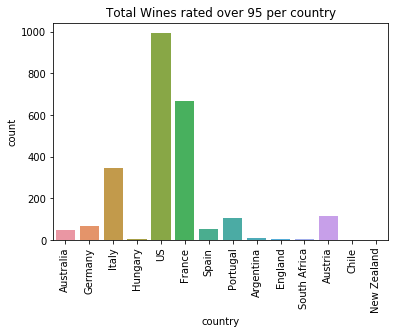

In [12]:
top_countries_plot = sns.countplot(x='country', data = top_wines)
top_countries_plot.set_xticklabels(top_countries_plot.get_xticklabels(), rotation = 90)
top_countries_plot.set_title(f'Total Wines rated over {top_range} per country')
plt.savefig('top_countries.png', bbox_inches='tight')

In [13]:
#Prolific Wines
prolific_wineries_df = wine_data.loc[:,["title", "price", "points", "winery", "variety"]]
prolific_wineries_df.head()

,title,price,points,winery,variety
0,Nicosia 2013 Vulkà Bianco (Etna),NaN,87,Nicosia,White Blend
1,Quinta dos Avidagos 2011 Avidagos Red (Douro),15.0,87,Quinta dos Avidagos,Portuguese Red
2,Rainstorm 2013 Pinot Gris (Willamette Valley),14.0,87,Rainstorm,Pinot Gris
3,St. Julian 2013 Reserve Late Harvest Riesling ...,13.0,87,St. Julian,Riesling
4,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,65.0,87,Sweet Cheeks,Pinot Noir


In [14]:
#List of the most prolific wineries
prolific_wineries = pd.DataFrame(prolific_wineries_df.winery.value_counts())
prolific_wineries.head()

,winery
Wines & Winemakers,222
Testarossa,218
DFJ Vinhos,215
Williams Selyem,211
Louis Latour,199


In [15]:
#Average Rating of wines at Wines & Winemakers
prolific_wineries_ww = prolific_wineries_df.loc[prolific_wineries_df["winery"] == "Wines & Winemakers", ['points']]
avg_ww_rating = prolific_wineries_ww.points.mean()
ww_rating = round(avg_ww_rating,3)
ww_rating

87.599

In [16]:
#Average Price of wines at Wines & Winemakers
prolific_wineries_ww = prolific_wineries_df.loc[prolific_wineries_df["winery"] == "Wines & Winemakers", ['price']]
avg_ww_price = prolific_wineries_ww.price.mean()
ww_price = round(avg_ww_price,3)
ww_price

17.502

In [17]:
#Average rating of wine in original data set
wine = wineries_df.points.mean()
wine_avg_rating = round(wine,3)
wine_avg_rating

NameError: name 'wineries_df' is not defined

In [ ]:
#Average price of wine in orginial data set
wine_price = wineries_df.price.mean()
wine_avg_price = round(wine_price,3)
wine_avg_price

In [ ]:
#Most variations of wine at Wines & winemakers
ww = prolific_wineries_df.loc[prolific_wineries_df["winery"] == "Wines & Winemakers", ['variety']]
ww_df = pd.DataFrame(ww.variety.value_counts())
ww_df

In [ ]:
pr = wineries_df.loc[wineries_df["variety"] == "Portuguese Red"]
#Average rating of Portuguese Red at Wine & winemakers
p_red = pr.points.mean()
port_red = round(p_red,3)
port_red

In [ ]:
#Average rating of Portuguese Red at Wine 
pred = pr.price.mean()
port_red_avg_price = round(pred,3)
port_red_avg_price

In [117]:
# bougiest white wines (by points and price)
whites_bougiest = white_data.groupby(['country'])['points', 'price'].mean().round(2)
whites_b_sorted = whites_bougiest.sort_values('points', ascending = False)
whites_b_sorted = whites_b_sorted.reset_index()
whites_b_sorted = whites_b_sorted.head(10)
whites_value_counts = pd.DataFrame(white_data['country'].value_counts())
whites_value_counts = whites_value_counts.reset_index()
whites_value_counts = whites_value_counts.rename(columns={'country':'value count', 'index':'country'})
whites_merge = whites_b_sorted.merge(whites_value_counts, on='country')
whites_merge

,country,points,price,value count
0,England,92.05,53.06,20
1,Austria,90.93,36.04,842
2,Hungary,90.47,27.68,19
3,Germany,90.08,44.07,1804
4,Switzerland,90.00,21.00,1
5,India,89.50,12.00,2
6,France,89.15,44.58,4714
7,Canada,89.08,29.98,95
8,Luxembourg,88.33,20.67,3
9,New Zealand,88.15,20.62,714


In [119]:
# bougiest red wines (by points and price)
reds_bougiest = red_data.groupby(['country'])['points', 'price'].mean().round(2)
reds_b_sorted = reds_bougiest.sort_values('price', ascending = False)
reds_b_sorted = reds_b_sorted.reset_index()
reds_b_sorted = reds_b_sorted.head(10)
reds_value_counts = pd.DataFrame(red_data['country'].value_counts())
reds_value_counts = reds_value_counts.reset_index()
reds_value_counts = reds_value_counts.rename(columns={'country':'value count', 'index':'country'})
reds_merge = reds_b_sorted.merge(reds_value_counts, on='country')
reds_merge

,country,points,price,value count
0,Switzerland,87.50,129.50,4
1,France,89.41,70.50,2385
2,England,91.86,50.14,7
3,Czech Republic,89.00,45.00,2
4,Italy,88.82,44.47,6045
5,Mexico,87.60,42.73,15
6,Serbia,89.00,40.67,3
7,US,88.88,39.72,15601
8,Hungary,87.70,38.00,10
9,Lebanon,87.94,37.19,16


In [ ]:
import tweepy
                                                
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()                                     
from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
both = ['Riesling', 'White Blend', 'Chardonnay', 'Sauvignon Blanc', 'Merlot', 'Sangiovese', 'Red Blend', 'Pinot Noir']

df = pd.read_csv('../../gw/Project_1/winemag-data-130k-v2.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna(axis=0, how='any')
df = df[['points', 'taster', 'twitter handle']]
df = df.loc[df['variety'].isin(both)]
df.head()

In [ ]:
# find tasters with over 1000 reviews
taster_counts = pd.DataFrame(df['taster'].value_counts())
taster_counts = taster_counts.reset_index()
taster_counts = taster_counts.rename(columns={'taster':'ratings', 'index':'taster'})
taster_counts_over_1000 = taster_counts.loc[taster_counts['ratings'] > 1000]
tasters = taster_counts_over_1000['taster'].tolist()
tasters.sort()

In [ ]:
# find tasters' corresponding twitter handles
handle_df = df.set_index('taster')
target_users = pd.DataFrame(handle_df.loc[tasters, 'twitter handle'])
target_users = target_users['twitter handle'].unique()
target_users = pd.Series(target_users).str.replace(u'\xa0', u'') 

In [ ]:
# find averages for tasters with over 1000 reviews
ave_ratings = []
for taster in tasters:
    test_df = df.loc[df['taster'] == taster]
    test_rating = test_df['points'].mean()
    results_list = {'taster': taster, 'average rating': test_rating}
    ave_ratings.append(results_list)
ave_ratings_df = pd.DataFrame(ave_ratings).round(3)
ave_ratings_df = ave_ratings_df[['taster', 'average rating']]
ave_ratings_df['twitter handle'] = target_users
ave_ratings_df

In [ ]:
# bar chart for average points per taster
x_axis = np.arange(len(tasters))
plt.bar(ave_ratings_df['taster'], ave_ratings_df['average rating'])
plt.xticks(rotation = 'vertical')
plt.title('Average Rating Per Taster')
plt.xlabel('Taster')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# sentiment analysis
overall_compound = []

for user in target_users:
    compound_list = []
    
    for x in range(1):
        public_tweets = api.user_timeline(user, page = 1)

        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet['text'])
            compound_list.append(results['compound'])
    
    compound_results = {'username': user, 'compound': np.mean(compound_list)}
    overall_compound.append(compound_results)

sentiment_df = pd.DataFrame(overall_compound).round(3)
sentiment_df['taster'] = tasters
sentiment_df['average rating'] = ave_ratings_df['average rating']
sentiment_df = sentiment_df[['taster', 'username', 'compound', 'average rating']]
sentiment_df

In [ ]:
#compound vs. average points (scatter)
plt.figure(figsize=(10,6))
plt.scatter(sentiment_df['compound'], sentiment_df['average rating'])
plt.grid()
plt.title('Average Rating for Tasters (with over 1000 reviews) Based on Sentiment Analysis')
plt.xlabel('Tweet Polarity')
plt.ylabel('Average Rating')
plt.show()